In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle
from experiment.batch_experiment import Batch

In [2]:
batch_name = "batch-2022-02-23"
time_consistent_batch = Batch(batch_name, "exp_time_consistent")
time_inconsistent_batch = Batch(batch_name, "exp_time_inconsistent")

In [3]:
time_consistent_batch.get_convergence_rate()

	>> Convergence rate: 0.650 (65 of 100 runs)


0.65

In [4]:
time_inconsistent_batch.get_convergence_rate()

	>> Convergence rate: 0.930 (93 of 100 runs)


0.93

		>> Replace all data with filtered data passed


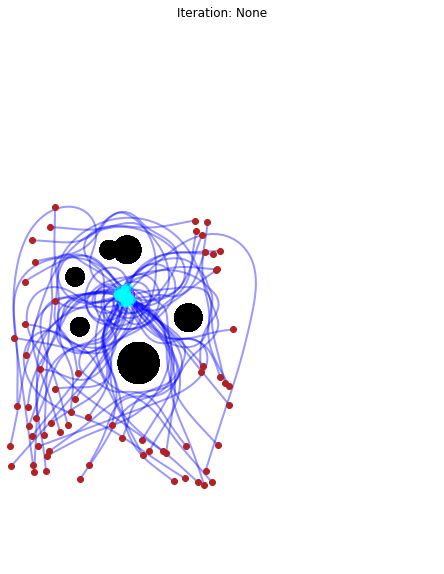

In [5]:
time_consistent_batch.visualize_all_runs(data=time_consistent_batch.get_success_run())

		>> Replace all data with filtered data passed


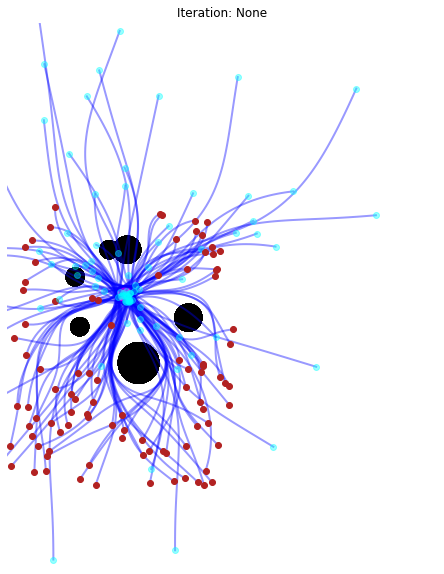

In [6]:
time_inconsistent_batch.visualize_all_runs(data=time_inconsistent_batch.get_success_run())

In [7]:
time_consistent_batch.get_statistics()

count    100.000000
mean      64.720000
std       62.685858
min        2.000000
25%       14.750000
50%       25.000000
75%      149.000000
max      149.000000
Name: iteration, dtype: float64

In [8]:
time_consistent_batch.info

{'g_params': [{'car': {'position_indices': [(0, 1)],
    'player_id': 0,
    'collision_r': 1.3591780604468278,
    'car_params': {'wheelbase': 2.413, 'length': 4.267, 'width': 1.988},
    'theta_indices': [2],
    'phi_index': 3,
    'vel_index': 4,
    'obstacles': [(9.0, 25.0),
     (20.0, 35.0),
     (6.5, 50.0),
     (-4.0, 33.0),
     (-5.0, 44.0),
     (2.5, 50.0)],
    'obstacle_radii': [4.5, 3.0, 3.0, 2.0, 2.0, 2.0]}}],
 'l_params': [{'car': {'goals': [(6.0, 40.0)], 'goal_radii': [2.0]}}]}

In [9]:
time_consistent_success_index = time_consistent_batch.data["experiment"][time_consistent_batch.data["is_converged"] == True].index
time_inconsistent_success_index = time_inconsistent_batch.data["experiment"][time_inconsistent_batch.data["is_converged"] == True].index

In [10]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
 
    if (a_set & b_set):
        return a_set & b_set
    else:
        print("No common elements")

In [11]:
common_index = sorted(common_member(time_consistent_success_index, time_inconsistent_success_index))

In [12]:
filtered_time_consistent_data = time_consistent_batch.data.iloc[common_index]
filtered_time_inconsistent_data = time_inconsistent_batch.data.iloc[common_index]

In [13]:
filtered_time_consistent_data["iteration"].describe()

count    63.000000
mean     19.365079
std      12.310894
min       2.000000
25%      12.500000
50%      15.000000
75%      24.000000
max      53.000000
Name: iteration, dtype: float64

In [14]:
filtered_time_inconsistent_data["iteration"].describe()

count     63.000000
mean      40.761905
std       37.164288
min        3.000000
25%       14.000000
50%       23.000000
75%       58.000000
max      140.000000
Name: iteration, dtype: float64

<AxesSubplot:>

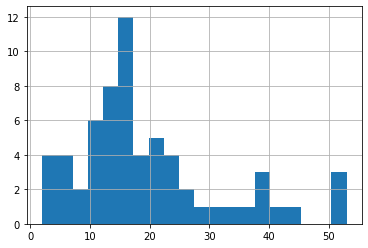

In [15]:
filtered_time_consistent_data["iteration"].hist(bins=20)

<AxesSubplot:>

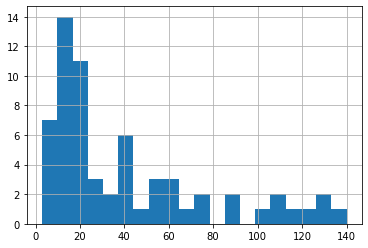

In [16]:
filtered_time_inconsistent_data["iteration"].hist(bins=20)

Report the following information:
* Of all the runs that are successful in pinch-point, how many violate safety afterward?
* Of all the runs that are successful in pinch-point that fail in time consistent, how many violate safety afterward?
* If these safety violated runs are taken off, what are the new statistics between time consistent and pinch-point?
* What are the percentage of success in time consistent if we only care about the first t-star?

	>> There are 93 success runs in pinch-point
		>> Among which 68 have max(J) >= 0
		>> Run index: [4, 5, 6, 7, 9, 10, 13, 14, 15, 16, 17, 19, 22, 24, 25, 27, 28, 30, 31, 33, 35, 36, 37, 39, 41, 42, 46, 47, 48, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 68, 72, 73, 74, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99]
		>> Replace all data with filtered data passed


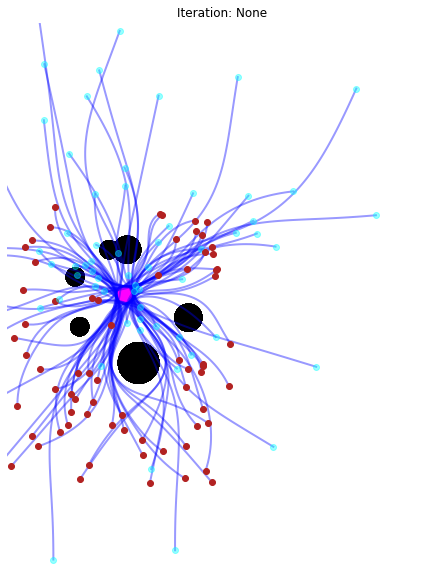

In [17]:
# success runs in pinchpoint using max(J) < 0 condition
from cost.obstacle_penalty import ObstacleDistCost

success_runs_fail_max_J_condition = []

for i in time_inconsistent_success_index:
    if max(np.array(time_inconsistent_batch.data.iloc[i]["value_func"]).flatten()) > 0:
        success_runs_fail_max_J_condition.append(i)

print("\t>> There are {} success runs in pinch-point".format(len(time_inconsistent_success_index)))
print("\t\t>> Among which {} have max(J) >= 0".format(len(success_runs_fail_max_J_condition)))
print("\t\t>> Run index: {}".format(success_runs_fail_max_J_condition))

time_inconsistent_batch.visualize_all_runs(data=time_inconsistent_batch.data.iloc[success_runs_fail_max_J_condition])

In [18]:
success_runs_satify_max_j_condition = list(set(time_inconsistent_success_index) - set(success_runs_fail_max_J_condition))

common_index = sorted(common_member(time_consistent_success_index, success_runs_satify_max_j_condition))
filtered_time_consistent_data = time_consistent_batch.data.iloc[common_index]
filtered_time_inconsistent_data = time_inconsistent_batch.data.iloc[common_index]

In [19]:
filtered_time_consistent_data["iteration"].describe()

count    23.000000
mean     15.695652
std       5.763796
min       4.000000
25%      13.000000
50%      15.000000
75%      19.000000
max      26.000000
Name: iteration, dtype: float64

In [20]:
filtered_time_inconsistent_data["iteration"].describe()

count    23.000000
mean     14.913043
std       4.888884
min       5.000000
25%      13.000000
50%      14.000000
75%      17.500000
max      23.000000
Name: iteration, dtype: float64

	>> There are 93 success runs in pinch-point
		>> Among which 30 have safety violations
		>> Run index: [4, 7, 13, 15, 16, 24, 27, 28, 31, 36, 39, 42, 46, 51, 54, 55, 56, 60, 73, 74, 82, 83, 86, 87, 89, 90, 91, 92, 94, 99]
		>> Replace all data with filtered data passed


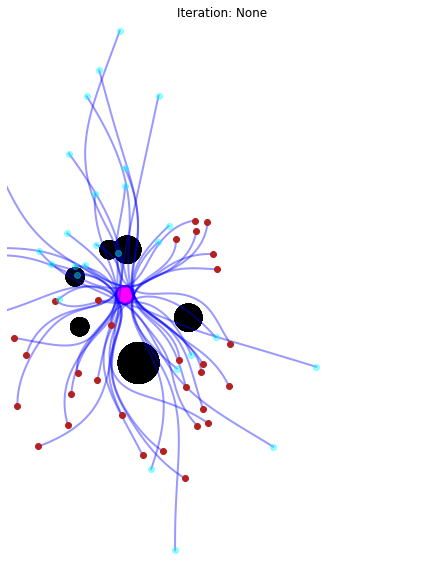

In [21]:
# success runs in pinchpoint with safety violation
from cost.obstacle_penalty import ObstacleDistCost

g_func = ObstacleDistCost(time_inconsistent_batch.info["g_params"][0]["car"])
success_runs_with_violation = []

for i in time_inconsistent_success_index:
    for j in range(time_inconsistent_batch.data.iloc[i]["first_t_star"][0], len(time_inconsistent_batch.data.iloc[i]["end_traj"])):
        if g_func(time_inconsistent_batch.data.iloc[i]["end_traj"][j])[0] > 0:
            success_runs_with_violation.append(i)
            break
print("\t>> There are {} success runs in pinch-point".format(len(time_inconsistent_success_index)))
print("\t\t>> Among which {} have safety violations".format(len(success_runs_with_violation)))
print("\t\t>> Run index: {}".format(success_runs_with_violation))

time_inconsistent_batch.visualize_all_runs(data=time_inconsistent_batch.data.iloc[success_runs_with_violation])

	>> Found 70 runs that are successful in pinch-point but fail in time consistent
		>> Among which 30 have safety violations
		>> Run index: [4, 7, 13, 15, 16, 24, 27, 28, 31, 36, 39, 42, 46, 51, 54, 55, 56, 60, 73, 74, 82, 83, 86, 87, 89, 90, 91, 92, 94, 99]
		>> Replace all data with filtered data passed


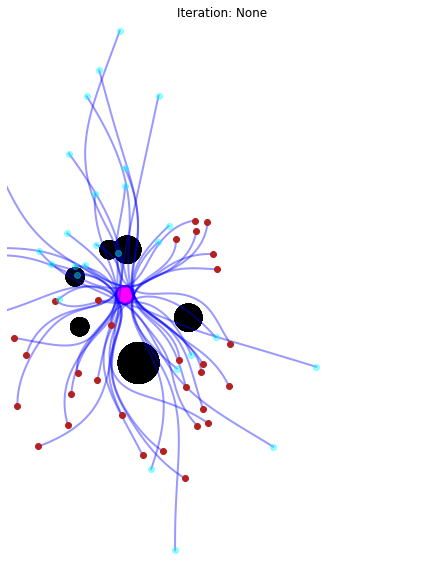

In [22]:
# index of runs that are successful in pinch-points that fail in time consistent:
index_list = list(set(time_inconsistent_success_index) - set(common_index))
print("\t>> Found {} runs that are successful in pinch-point but fail in time consistent".format(len(index_list)))

index_with_violations = list(set(index_list) & set(success_runs_with_violation))

print("\t\t>> Among which {} have safety violations".format(len(index_with_violations)))
print("\t\t>> Run index: {}".format(index_with_violations))

time_inconsistent_batch.visualize_all_runs(data=time_inconsistent_batch.data.iloc[index_with_violations])

In [23]:
success_runs_without_safety_violations_pinchpoint = list(set(time_inconsistent_success_index) - set(success_runs_with_violation))

In [24]:
len(success_runs_without_safety_violations_pinchpoint)

63

In [25]:
common_index = sorted(common_member(time_consistent_success_index, success_runs_without_safety_violations_pinchpoint))
filtered_time_consistent_data = time_consistent_batch.data.iloc[common_index]
filtered_time_inconsistent_data = time_inconsistent_batch.data.iloc[common_index]

In [26]:
filtered_time_consistent_data["iteration"].describe()

count    46.000000
mean     16.586957
std      10.615662
min       2.000000
25%      10.250000
50%      15.000000
75%      20.000000
max      53.000000
Name: iteration, dtype: float64

In [27]:
filtered_time_inconsistent_data["iteration"].describe()

count     46.000000
mean      33.521739
std       35.803624
min        3.000000
25%       13.000000
50%       17.500000
75%       42.750000
max      140.000000
Name: iteration, dtype: float64

In [28]:
# success runs in time consistent if we only care about first_t_star
time_consistent_success_first_t_star = (time_consistent_batch.data["first_negative_cost"][np.array(np.where(time_consistent_batch.data["first_negative_cost"] > 0)).flatten()]).index

In [29]:
len(time_consistent_success_first_t_star)

88

In [30]:
common_index = sorted(common_member(time_consistent_success_first_t_star, time_inconsistent_success_index))
filtered_time_consistent_data = time_consistent_batch.data.iloc[common_index]
filtered_time_inconsistent_data = time_inconsistent_batch.data.iloc[common_index]

In [31]:
filtered_time_consistent_data["first_negative_cost"].describe()

count    83.000000
mean     18.602410
std      15.189004
min       1.000000
25%       9.000000
50%      14.000000
75%      23.000000
max      77.000000
Name: first_negative_cost, dtype: float64

In [32]:
filtered_time_inconsistent_data["iteration"].describe()

count     83.000000
mean      33.939759
std       34.867117
min        2.000000
25%       11.000000
50%       19.000000
75%       44.000000
max      140.000000
Name: iteration, dtype: float64

	>> There are 88 success runs in time consistent
		>> Among which 10 have safety violations
		>> Run index: [5, 6, 10, 33, 39, 47, 57, 83, 85, 89]
		>> Replace all data with filtered data passed


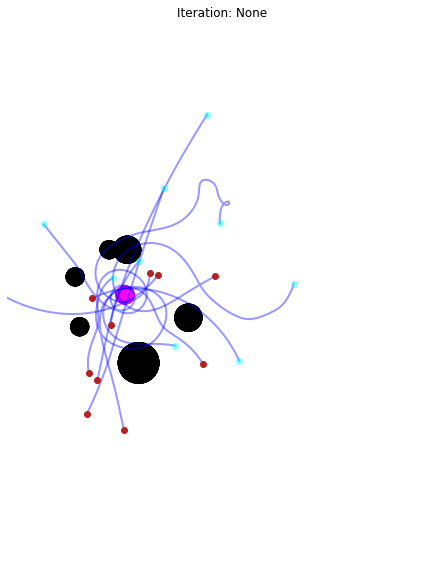

In [33]:
# success runs in time consistent, evaluated at first t star (first J_0 < 0), with no safety violation
from cost.obstacle_penalty import ObstacleDistCost

g_func = ObstacleDistCost(time_inconsistent_batch.info["g_params"][0]["car"])
success_runs_first_t_star_with_violation = []

for i in time_consistent_success_first_t_star:
    for j in range(time_consistent_batch.data.iloc[i]["first_t_star"][0], len(time_consistent_batch.data.iloc[i]["end_traj"])):
        if g_func(time_consistent_batch.data.iloc[i]["end_traj"][j])[0] > 0:
            success_runs_first_t_star_with_violation.append(i)
            break

print("\t>> There are {} success runs in time consistent".format(len(time_consistent_success_first_t_star)))
print("\t\t>> Among which {} have safety violations".format(len(success_runs_first_t_star_with_violation)))
print("\t\t>> Run index: {}".format(success_runs_first_t_star_with_violation))

time_consistent_batch.visualize_all_runs(data=time_consistent_batch.data.iloc[success_runs_first_t_star_with_violation])

In [51]:
# with the time consistent runs that are successful by considering J_0 < 0, among cases that have safety violations after first t_star
# how many runs eventually find a trajectory that does not violate safety

eventually_not_violate_safety = []
is_safe = False

for i in success_runs_first_t_star_with_violation:
    for j in range(time_consistent_batch.data.iloc[i]["first_negative_cost"], len(time_consistent_batch.data.iloc[i]["all_traj"])):
        is_safe = True
        for state in time_consistent_batch.data.iloc[i]["all_traj"][j]:
            if g_func(state)[0] > 0:
                is_safe = False
                break
        if is_safe:
            eventually_not_violate_safety.append(i)
            break

print(len(eventually_not_violate_safety))

6


	>> There are 88 success runs in time consistent using J_0 < 0
		>> Among which 23 have max(J) >= 0
		>> Run index: [5, 6, 10, 12, 22, 25, 33, 39, 47, 56, 57, 60, 69, 83, 85, 86, 88, 89, 90, 93, 94, 95, 99]
		>> Replace all data with filtered data passed


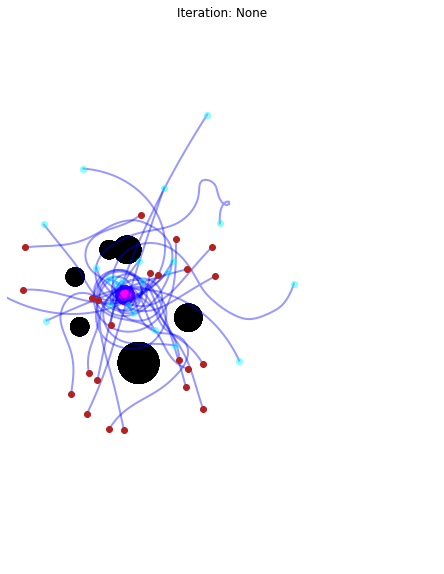

In [53]:
# among successful time consistent case evaluted at first J_0 < 0, how many have already satisfied max(J) < 0
from cost.obstacle_penalty import ObstacleDistCost

success_runs_fail_max_J_condition = []

for i in time_consistent_success_first_t_star:
    if max(np.array(time_consistent_batch.data.iloc[i]["value_func"]).flatten()) > 0:
        success_runs_fail_max_J_condition.append(i)

print("\t>> There are {} success runs in time consistent using J_0 < 0".format(len(time_consistent_success_first_t_star)))
print("\t\t>> Among which {} have max(J) >= 0".format(len(success_runs_fail_max_J_condition)))
print("\t\t>> Run index: {}".format(success_runs_fail_max_J_condition))

time_consistent_batch.visualize_all_runs(data=time_consistent_batch.data.iloc[success_runs_fail_max_J_condition])